     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 66.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 97.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 5.5 MB/s eta 0:00:00
Mounted at /content/drive
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male

<ipython-input-2-b0b92de0e6b4>:33: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[col].dropna(), shade=True)


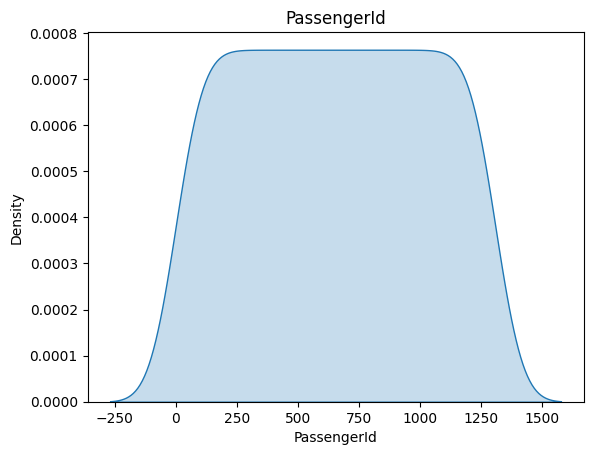

<ipython-input-2-b0b92de0e6b4>:33: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[col].dropna(), shade=True)


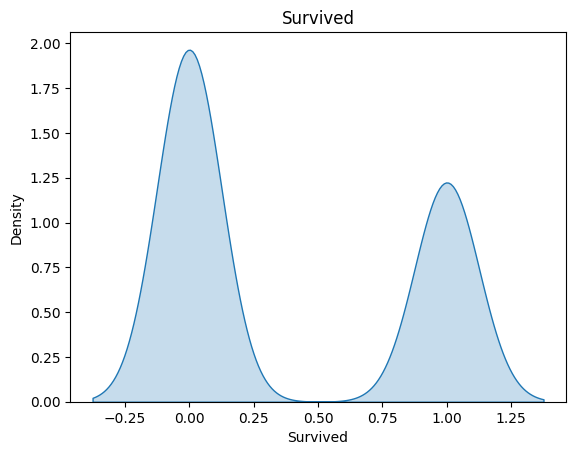

<ipython-input-2-b0b92de0e6b4>:33: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[col].dropna(), shade=True)


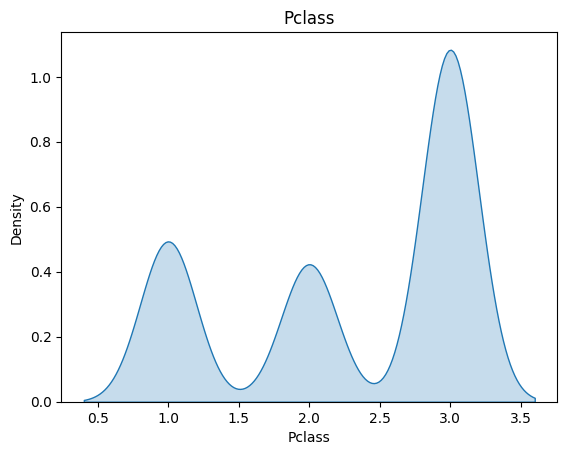

<ipython-input-2-b0b92de0e6b4>:33: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[col].dropna(), shade=True)


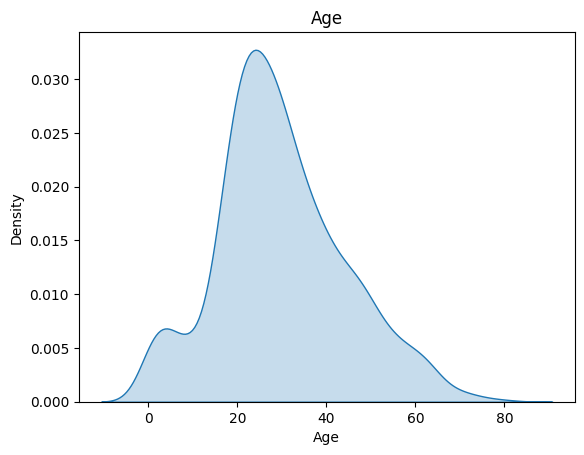

<ipython-input-2-b0b92de0e6b4>:33: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[col].dropna(), shade=True)


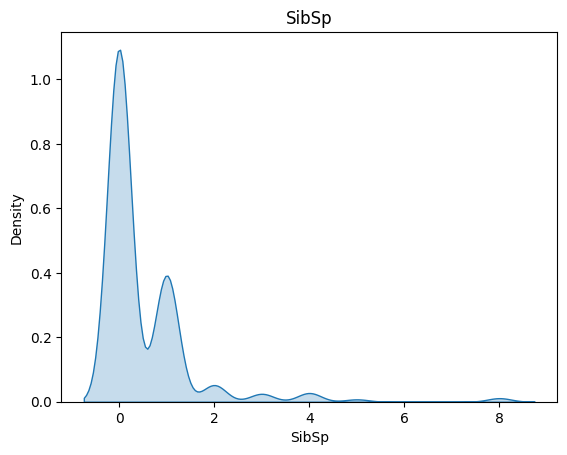

<ipython-input-2-b0b92de0e6b4>:33: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[col].dropna(), shade=True)


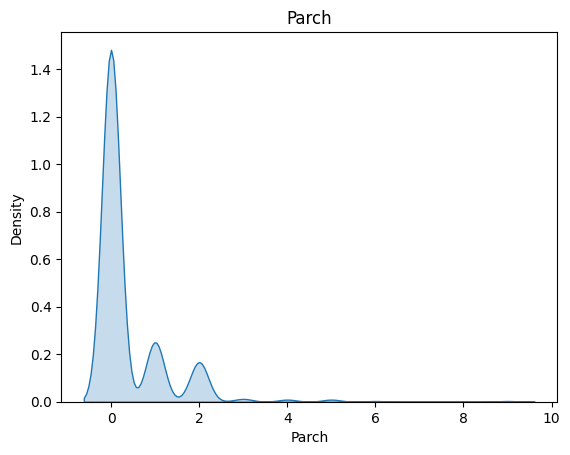

<ipython-input-2-b0b92de0e6b4>:33: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[col].dropna(), shade=True)


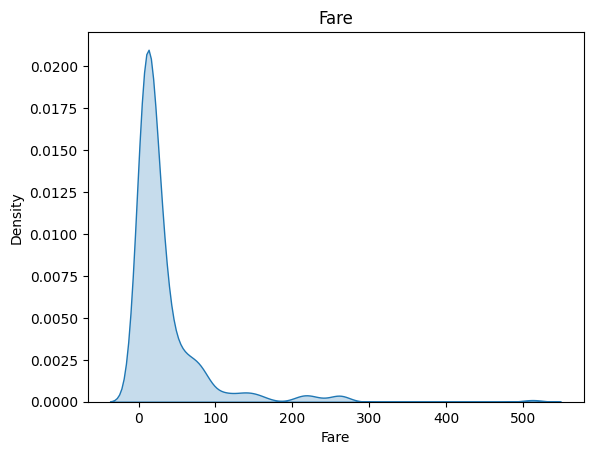

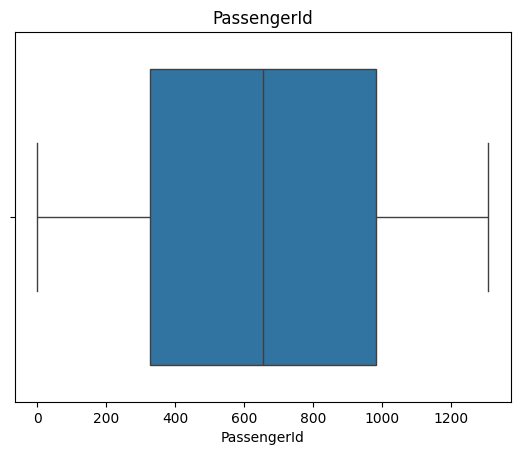

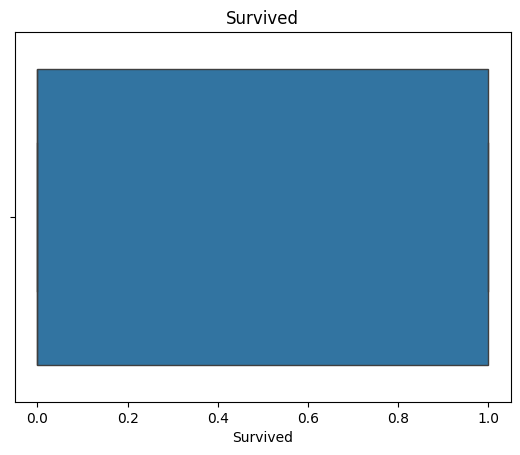

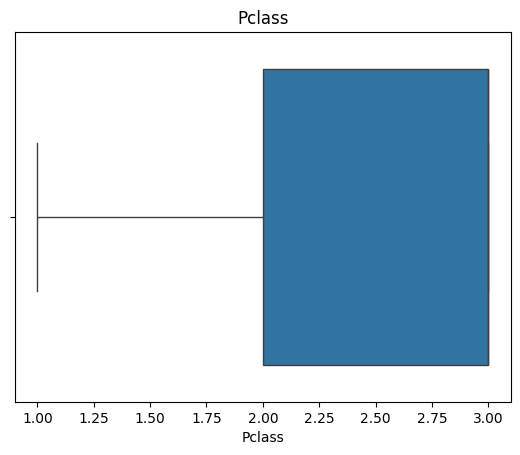

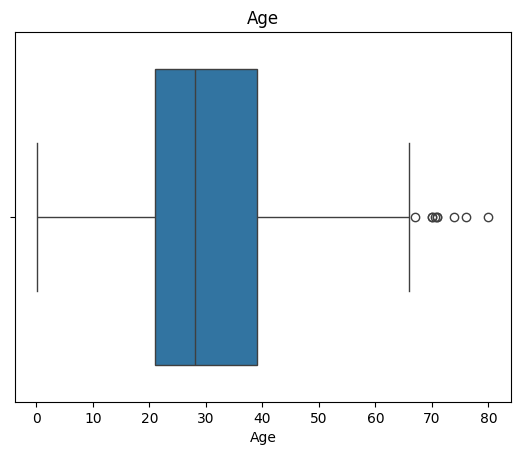

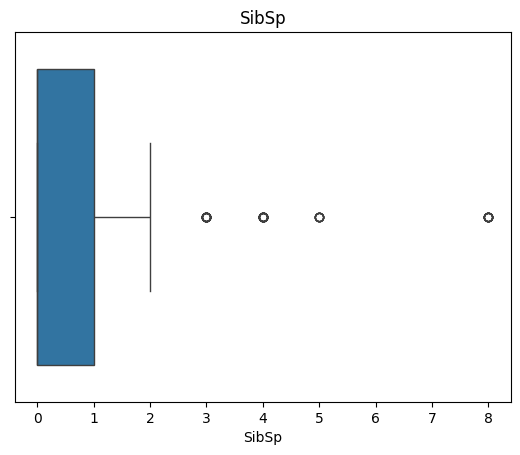

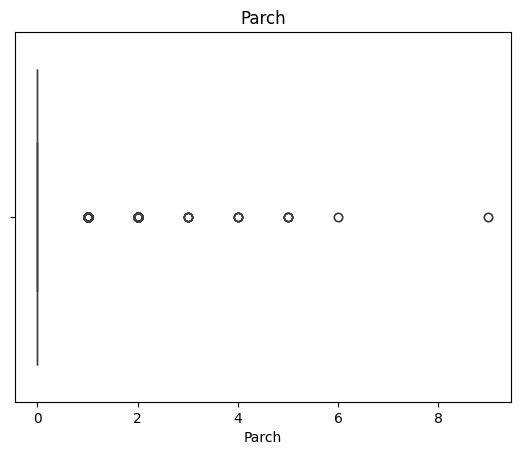

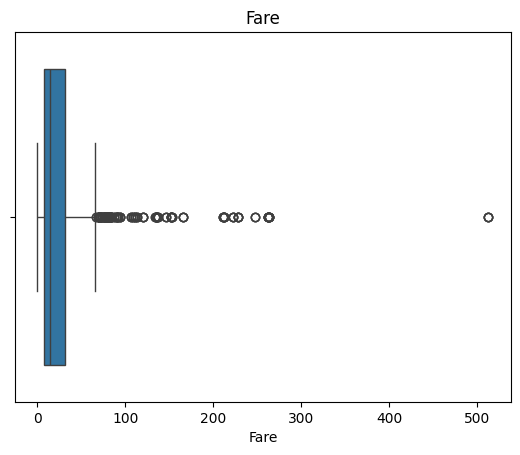

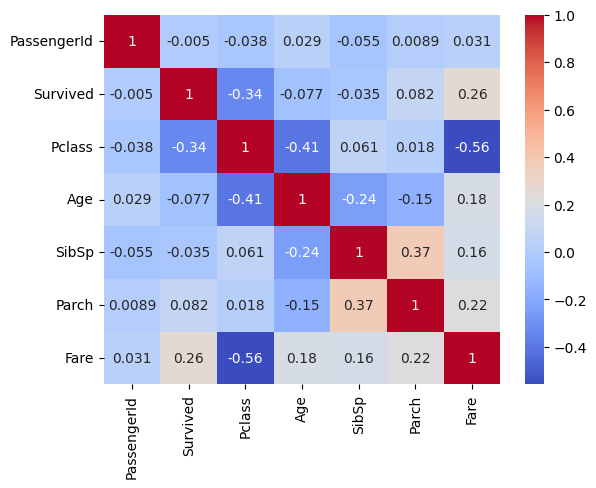

Accuracy: 0.890625
Precision: 0.75
Recall: 0.6923076923076923
F1: 0.72
AUC: 0.9547511312217195


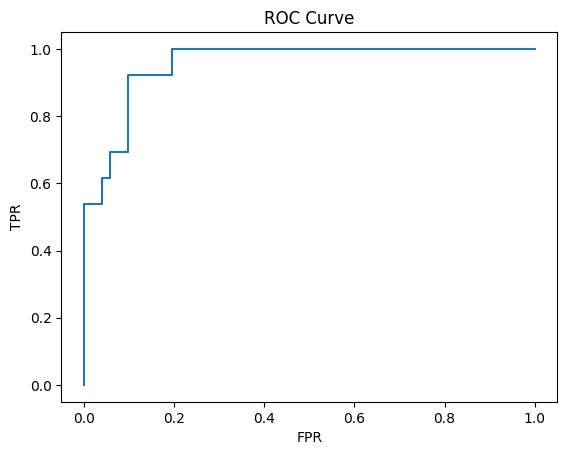

In [2]:
# Install Streamlit
!pip install streamlit

# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import streamlit as st
import pickle
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve

# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Load Data
test_data = pd.read_csv('/content/drive/My Drive/Titanic_test.csv')
train_data = pd.read_csv('/content/drive/My Drive/Titanic_train.csv')

# Exploration
print(train_data.head())
print(test_data.head())

# Concatenate
df = pd.concat([train_data, test_data], ignore_index=True)

# KDE Plot
for col in df.select_dtypes(include=np.number).columns:
    sns.kdeplot(df[col].dropna(), shade=True)
    plt.title(col)
    plt.show()

# Boxplot
for col in df.select_dtypes(include=np.number).columns:
    sns.boxplot(x=df[col])
    plt.title(col)
    plt.show()

# Heatmap
sns.heatmap(df.select_dtypes(include=np.number).corr(), annot=True, cmap='coolwarm')
plt.show()

e = LabelEncoder()
for col in df.select_dtypes(include='object').columns:
    df[col] = e.fit_transform(df[col].astype(str))


# Outlier Removal
for col in df.select_dtypes(include=np.number).columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    df = df[(df[col] >= Q1 - 1.5*IQR) & (df[col] <= Q3 + 1.5*IQR)]

# Preprocessing
df.fillna(df.mean(), inplace=True)
df.drop_duplicates(inplace=True)

le = LabelEncoder()
for col in df.select_dtypes(include='object').columns:
    df[col] = le.fit_transform(df[col].astype(str))

# Split Data
X = df.drop('Survived', axis=1)
y = df['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Model
model = LogisticRegression()
model.fit(X_train, y_train)

# Save Model
with open('logistic_model.pkl', 'wb') as f:
    pickle.dump(model, f)
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

# Evaluation
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1:", f1_score(y_test, y_pred))
print("AUC:", roc_auc_score(y_test, model.predict_proba(X_test)[:, 1]))

# ROC
fpr, tpr, _ = roc_curve(y_test, model.predict_proba(X_test)[:, 1])
plt.plot(fpr, tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC Curve')
plt.show()

import pickle

# Save trained model
with open("logistic_model.pkl", "wb") as f:
    pickle.dump(model, f)

# Save fitted scaler
with open("scaler.pkl", "wb") as f:
    pickle.dump(scaler, f)





# INTERVIEW QUESTIONS AND ANSWERS
# ----------------------------------------

# 1) What is the difference between precision and recall?

# Precision:
# - Precision is the percentage of relevant results among the retrieved ones.
# - It answers: "Of all the predicted positive cases, how many were actually correct?"
# - Formula: Precision = True Positives / (True Positives + False Positives)

# Recall:
# - Recall is the percentage of relevant results that were actually retrieved.
# - It answers: "Of all actual positive cases, how many did we correctly identify?"
# - Formula: Recall = True Positives / (True Positives + False Negatives)


# 2) What is cross-validation, and why is it important in binary classification?

# Cross-validation:
# - It is a technique to split the dataset into multiple parts (folds) to train and test the model multiple times.
# - The most common type is k-fold cross-validation.

# Why it's important:
#  It gives a better estimate of model performance on unseen data.
#  Helps avoid overfitting and ensures that the model generalizes well.
#  Especially useful in binary classification where class imbalance can affect results.
